In [2]:
import numpy as np
import torch
import os
import syndata
import mgplvm
from mgplvm.manifolds import Torus, Euclid 
import matplotlib.pyplot as plt
import mgplvm.crossval as cv
from mgplvm.utils import get_device
from scipy.stats import ttest_1samp, sem
plt.rcParams.update({'font.size': 22})
torch.set_default_dtype(torch.float64)
device = get_device()  # get_device("cpu")

In [2]:
def plot_cvs(data, labs, label=''):
    niters, nmanifs = data.shape

    #plot each partition
    shift = 5 * niters #x values + add jitter
    xs = np.array([(np.arange(niters) + i * shift) for i in range(nmanifs)]).T 
    plt.figure(figsize=(3, 5))
    for j in range(niters):
        for i in range(nmanifs):
            plt.errorbar(xs[j, i], data[j, i], yerr=[0], fmt="ko", capsize=3)
            if i > 0:
                plt.plot([xs[j, i - 1], xs[j, i]], [data[j, i - 1], data[j, i]],
                         "k--")

    plt.xticks([(niters - 1) / 2 + i * shift for i in range(nmanifs)], labs)
    ymin, ymax = np.amin(data), np.amax(data)
    ymin, ymax = ymin - (ymax - ymin) / 10, ymax + (ymax - ymin) / 10
    plt.box(False)
    plt.plot(np.zeros(2) - niters - 1, [ymin, ymax], "k-")
    plt.tick_params(axis="both", length=0)
    plt.tick_params(axis="y", pad=-3)
    plt.tick_params(axis="x", pad=-5)
    plt.ylabel(label)
    plt.show()
    plt.close()
    
    # also plot mean + sem
    plt.figure(figsize=(3, 5))
    means = np.mean(data, axis=0)
    sems = sem(data, axis=0)
    plt.errorbar(np.mean(xs, axis=0), means, yerr=sems, fmt='k-', capsize=5)
    plt.xticks([(niters - 1) / 2 + i * shift for i in range(nmanifs)], labs)
    plt.box(False)
    plt.plot(np.zeros(2) - niters - 1, [ymax, ymin], "k-")
    plt.tick_params(axis="both", length=0)
    plt.tick_params(axis="y", pad=-3)
    plt.tick_params(axis="x", pad=-5)
    plt.ylabel(label)
    plt.show()
    plt.close()

In [3]:
# %% parameters
n = 80 # number of neurons
m = 100  # number of conditions / time points
n_z = 10  # number of inducing points
n_samples = 1  # number of samples
niter = 5  # number of models to fit
max_steps = 500 #max iteration number
manifs = [(Torus, 1), (Euclid, 1)] #manifolds to fit

fname = '_cv_tmp' #save trained models here
try:
    os.mkdir(fname)
except:
    print(fname, 'already exists')

for i in range(niter):
    # generate a new synthetic dataset for each iteration
    gen = syndata.Gen(syndata.Torus(1), n, m, l = 0.5, beta = 0.2)  
    Y = gen.gen_data()
    
    print('\n\nnew iter', i, 'mean activity', np.mean(Y))
    #train model
    cv.train_cv(Y, 
                manifs, 
                n_z, 
                device, 
                max_steps=max_steps,
                n_b=128, 
                burnin='default', 
                lrate=5e-2, 
                outname=fname + '/iter' + str(i))
    

_cv_tmp already exists


new iter 0 mean activity 0.2945979873224209
_cv_tmp/iter0 already exists

fitting manifold Torus(1)


/var/home/ktj21/Documents/hennequin/research/analysis/mgplvm-pytorch/mgplvm/sgp.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sigma = torch.ones(n,) * 0.2 if sigma is None else torch.tensor(


iter  500 | elbo 0.5869 | kl 0.0868 | loss -0.5007 | |mu| 1.6435 | alpha_sqr 0.1940 | ell 0.8547 | sig 0.0445
fitting manifold Euclid(1)
iter  500 | elbo 0.5497 | kl 0.1048 | loss -0.4455 | |mu| 1.3440 | alpha_sqr 0.1714 | ell 0.6369 | sig 0.0313

new iter 1 mean activity 0.30549318125061264
_cv_tmp/iter1 already exists

fitting manifold Torus(1)
iter  500 | elbo 0.6558 | kl 0.0878 | loss -0.5686 | |mu| 1.4993 | alpha_sqr 0.2061 | ell 0.8838 | sig 0.0455
fitting manifold Euclid(1)
iter  500 | elbo 0.5709 | kl 0.1068 | loss -0.4648 | |mu| 1.4708 | alpha_sqr 0.1755 | ell 0.6349 | sig 0.0311

new iter 2 mean activity 0.31654020944737826
_cv_tmp/iter2 already exists

fitting manifold Torus(1)
iter  500 | elbo 0.6244 | kl 0.0874 | loss -0.5375 | |mu| 1.6007 | alpha_sqr 0.1981 | ell 0.8906 | sig 0.0464
fitting manifold Euclid(1)
iter  500 | elbo 0.6004 | kl 0.1011 | loss -0.4999 | |mu| 1.3990 | alpha_sqr 0.2395 | ell 0.9253 | sig 0.0396

new iter 3 mean activity 0.32577317321938337
_cv_tmp/i

In [4]:
## compute test log likelihoods and MSEs
NLLs = cv.calc_NLLs(fname)
MSEs = cv.calc_MSEs(fname)
labels=['T1', 'R1']


computing cross-validated log likelihoods
5 iterations & 2 manifolds
0: Torus(1) NLL=-0.4175605377619216
0: Euclid(1) NLL=-0.2847494903580487
1: Torus(1) NLL=-0.40763868791424696
1: Euclid(1) NLL=-0.2755378437082717
2: Torus(1) NLL=-0.4126083008606656
2: Euclid(1) NLL=-0.34879520993346613
3: Torus(1) NLL=-0.42241900595685555
3: Euclid(1) NLL=-0.39208587689175756
4: Torus(1) NLL=-0.4368220310510279
4: Euclid(1) NLL=-0.29459942258546934

computing cross-validated mean squared errors
5 iterations & 2 manifolds
0: Torus(1) 0.015672244763026272 0.10872086616642437
0: Euclid(1) 0.01898091779424359 0.10872086616642437
1: Torus(1) 0.012984955411394092 0.10804014551821711
1: Euclid(1) 0.018509805980063236 0.10804014551821711
2: Torus(1) 0.012824809338776114 0.10897376242874138
2: Euclid(1) 0.014385984456750784 0.10897376242874138
3: Torus(1) 0.012517394263305049 0.10566010043685181
3: Euclid(1) 0.013033084754614822 0.10566010043685181
4: Torus(1) 0.012668647800711013 0.10327507422678762
4: Euc

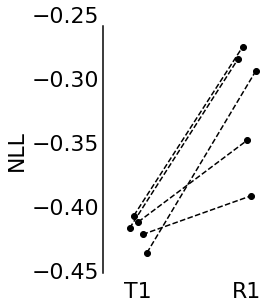

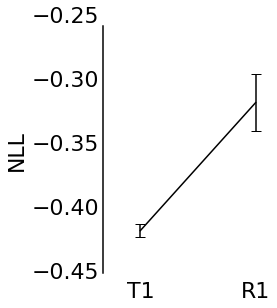

p = 0.011058613625309828


In [7]:
## plot test log likelihoods
plot_cvs(NLLs, labels, label="NLL")
print('p =', ttest_1samp(NLLs[:, 0] - NLLs[:, 1], 0)[1])

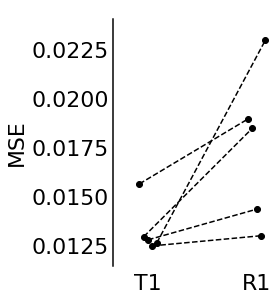

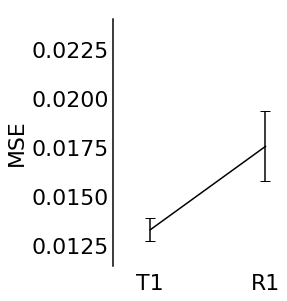

p = 0.07126798656287618


In [8]:
## plot test MSEs
plot_cvs(MSEs, labels, label="MSE")
print('p =', ttest_1samp(MSEs[:, 0] - MSEs[:, 1], 0)[1])